<a href="https://colab.research.google.com/github/JaredGlaub/NeuralNetworks/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Machine Learning
### Assignment 6 - Neural Networks

Description:
This individual assignment involves fitting a neural network to the MNIST data, testing alternative network structures, activation functions, optimization methods, and/or hyperparameter settings. As in Assignment 5, we will assess classification performance accuracy and processing time. Python TensorFlow should be used for Assignment 6. (If you experience difficulty installing TensorFlow, Python scikit-learn may be used as an alternative for Assignment 6.)

The Benchmark Experiment
Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels on each of two experimental factors (at least a 2x2 completely crossed design). But due to the time required to fit each neural network, we will observe only one trial for each cell in the design. Also, we will be using a simple training-and-test split with the split having been performed previously. That is, we use the training and test sets that come with MNIST.

An example experiment could include two values for the number of nodes per inner layer and two values for the number of inner layers. Various machine learning hyperparameter settings may be used.

Students are encouraged to work in STUDY TEAMS on this assignment, with the understanding that each student must run the code himself/herself and write an independent report of the experimental results. 

An example of the results from this assignment should be provided in a table such as the following:
Image added to the assignment section within Canvas.

In summary, this assignment asks you to fit a number of neural networks, comparing processing time and performance across experimental treatments.

Management Question
Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

Programming Resources
Géron, A. (2017). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O’Reilly. [ISBN-13 978-1-491-96229-9]. Chapter 11: Training Deep Neural Networks (pp. 275–312). Chapter 11 code (a Jupyter Notebook file 11_deep_learning.ipynb) shows how to use TensorFlow with the MNIST data set:
Source code available at via Github


##### Extensive coding examples are provided under:
Modules 6 / Additional Resources 

For students wanting to compare TensorFlow with scikit-learn or other systems for building neural networks, it is good to have common input data. See the programs under:
Modules 6 / Additional Resources / Jump-Start MNIST Data Prep

For a demonstration of scikit-learn fitting of neural networks, a demonstration is shown under:
Modules 6 / Additional Resources / Jump-Start MNIST Scikit-Learn Neural Networks


TensorFlow documentation and tutorials are available online at
https://www.tensorflow.org/api_docs/python 
https://www.tensorflow.org/tutorials/index.html

Visualization of TensorFlow work is provided through TensorBoard, with documentation at
https://www.tensorflow.org/get_started/summaries_and_tensorboard 
https://www.tensorflow.org/get_started/graph_viz 

For tutorials from the TensorFlow Developers Summit 2017
https://www.youtube.com/playlist?list=PLOU2XLYxmsIKGc_NBoIhTn2Qhraji53cv 

There is also a Lynda.com course introducing TensorFlow. See the reference under Modules / Technology Resources.

Background information on neural network structure and parameter estimation and the mathematics of optimization (backpropagation) may be found at:
https://www.youtube.com/watch?v=aircAruvnKk 


An advanced Google presentation from the TensorFlow Developers Summit 2017 demonstrates the wide range of possibilities available through TensorBoard:
https://www.youtube.com/watch?v=eBbEDRsCmv4&list=PLOU2XLYxmsIKGc_NBoIhTn2Qhraji53cv&index=5


Grading Guidelines (50 points)
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
Please upload the completed jupyter notebook (PREFERRED)

OR

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include (1) a summary and problem definition for management; (2) discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; (3) overview of programming work; and (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
Refer to Google’s Python Style Guide for ideas about formatting Python code

Also refer to Google’s TensorFlow Style Guide

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.


Purpose: 
The goal of this assignment is to fit a number of neural networks, comparing processing time and performance across experimental treatments. During this process we need to also address the below question that solves a business need.

Additional resouces on OCR:
https://www.ritchieng.com/machine-learning-photo-ocr/ 

Frameworks:
Python TensorFlow should be used and in case you are experiencing difficulty installing TensorFlow, Python Scikit Learn can be used

The following steps might help: 
- Set up Parameters such as, learning_rate, training_epochs, batch_size = 128, step = 1 along with network parameters inputs, classes, nodes & layers. 
- Define Layers, creating a NN with weights & biases 
- setup the cost Function & the optimizer
- train model and identify model accuracy ( make sure to time the runs )
- Repeating for different Number of Nodes/Layers


### Preprocessing

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Common imports: Numpy, os and time.
import numpy as np
import os
import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Table creation for Tensor Flow Neural Network Benchmark Experiment Results
import sys
!{sys.executable} -m pip install tabulate
from tabulate import tabulate

# Tensor Flow Neural Network
import keras
#import tensorflow as tf
from tensorflow.keras import backend

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# dataframe submission of predictions
import pandas as pd

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    #tf.reset_default_graph()
    tf.compat.v1.get_default_graph()
    #tf.set_random_seed(seed)
    tf.random.set_random_seed(seed)
    np.random.seed(seed)   

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Load MNIST Data Set
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Check the shape of MNIST data aset
print("Shape of Training data: ", X_train.shape)
print("Shape of Validate data: ", X_valid.shape)
print("Shape of Test data: ", X_test.shape)

print("\nShape of Training data: ", y_train.shape)
print("Shape of Validate data: ", y_valid.shape)
print("Shape of Test data: ", y_test.shape)

Shape of Training data:  (55000, 784)
Shape of Validate data:  (5000, 784)
Shape of Test data:  (10000, 784)

Shape of Training data:  (55000,)
Shape of Validate data:  (5000,)
Shape of Test data:  (10000,)


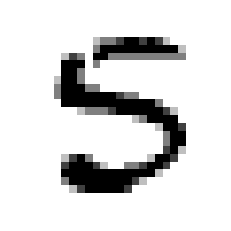

The target value is 5


In [ ]:
some_digit = X_train[36001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

plt.show()
print("The target value is", y_train[36001])

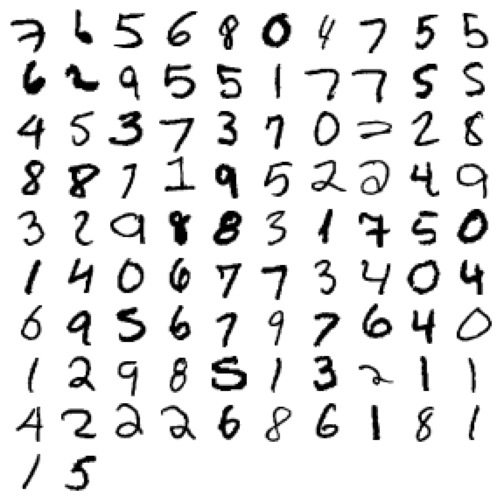

In [ ]:
# additonal plots that show a number of rows

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:12000:600], X_train[13000:30600:600], X_train[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

#####  Model 1 : 2 layers, 1st layers: 300 neurons, 2nd layers: 100 neurons

In [ ]:
# CONSTRUCTION PHASE

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer
# Neural Network - 2 layers

n_inputs = 28*28  # MNIST features = 28 pixels n 28 pixels for input
n_hidden1_M1 = 300 # 300 hidden neurons in the 1st layer
n_hidden2_M1 = 100 # 100 hidden neurons in the 2nd layer
n_outputs = 10 # 10 outputs (0-9)

In [ ]:
# Setup placeholder nodes to represent the training data and targets
reset_graph() #reset previous graph not to disturve the following process. 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [ ]:
# Create Neural Network　with tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1_M1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2_M1, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [ ]:
# Cost function for training Neural Network
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
# Gradient Descent Optimizer to minimize the cost function by learning_rate = 0.01 
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
# Measure classification performance by in_top_k().
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
# Node to initialize all the variables
init = tf.global_variables_initializer()

In [ ]:
# Create saver to save trained parameters.
saver = tf.train.Saver(save_relative_paths=True) 

In [ ]:
# EXECUTION PHASE

# Set number of epochs and batch size for training model.
n_epochs = 40
batch_size = 50

In [ ]:
# Record start time for neral network training
start_time_M1 = time.clock()

In [ ]:
# Create function to shuffle training data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [ ]:
#Training model by using neural network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_M1 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val_M1 = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_M1, "Val accuracy:", acc_val_M1)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.906
1 Batch accuracy: 0.92 Val accuracy: 0.9272
2 Batch accuracy: 0.94 Val accuracy: 0.9348
3 Batch accuracy: 0.9 Val accuracy: 0.9402
4 Batch accuracy: 0.94 Val accuracy: 0.9438
5 Batch accuracy: 0.94 Val accuracy: 0.9482
6 Batch accuracy: 1.0 Val accuracy: 0.9536
7 Batch accuracy: 0.94 Val accuracy: 0.9584
8 Batch accuracy: 0.96 Val accuracy: 0.9606
9 Batch accuracy: 0.9 Val accuracy: 0.9616
10 Batch accuracy: 0.9 Val accuracy: 0.9634
11 Batch accuracy: 1.0 Val accuracy: 0.965
12 Batch accuracy: 0.98 Val accuracy: 0.966
13 Batch accuracy: 0.98 Val accuracy: 0.9664
14 Batch accuracy: 1.0 Val accuracy: 0.9672
15 Batch accuracy: 0.92 Val accuracy: 0.969
16 Batch accuracy: 1.0 Val accuracy: 0.9698
17 Batch accuracy: 1.0 Val accuracy: 0.9698
18 Batch accuracy: 0.98 Val accuracy: 0.9706
19 Batch accuracy: 0.96 Val accuracy: 0.9728
20 Batch accuracy: 1.0 Val accuracy: 0.974
21 Batch accuracy: 1.0 Val accuracy: 0.973
22 Batch accuracy: 0.96 Val accuracy:

In [ ]:
# Make prediction by using test data
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M1 = np.argmax(Z, axis=1)
    accuracy_M1 = accuracy.eval(feed_dict={X: X_test, 
                                        y: y_test})
    final_z = logits.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [ ]:
# Print prediction classess and actual classess.
print("-------- Model 1 --------")
print("300 neurons (1st layer), 100 neurons (2nd layer)")
print("\nPredicted classes:", y_pred_M1)
print("Actual classes:", y_test[:20])
print("Test Set Accracy:", accuracy_M1)

# Record end time for neral network training
stop_time_M1 = time.clock()

#Total processing time
runtime_M1 = stop_time_M1 - start_time_M1 

print("\nStart time:", start_time_M1)
print("Stop time:", stop_time_M1)
print("processing time:", runtime_M1)

-------- Model 1 --------
300 neurons (1st layer), 100 neurons (2nd layer)

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Set Accracy: 0.9782

Start time: 465.363374
Stop time: 620.511231
processing time: 155.14785699999993


##### Model 2 :  2 layers, 1st layer: 600 neurons, 2nd layer: 200 neurons

In [ ]:
# CONSTRUCTION PHASE

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer
# Neural Network - 2 layers

n_inputs = 28*28  # MNIST features = 28 pixcels n 28 pixcels for input
n_hidden1_M2 = 600 # 300 hidden neurons in the 1st layer
n_hidden2_M2 = 200 # 100 hidden neurons in the 2nd layer
n_outputs = 10 # 10 outputs (0-9)

In [ ]:
# Setup placeholder nodes to represent the training data and targets
tf.reset_default_graph()  #reset previous graph not to disturve the following process. 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [ ]:
# Create Neural Network　with tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1_M1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2_M1, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [ ]:
# Cost function for training Neural Network
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
# Gradient Descent Optimizer to minimize the cost function by learning_rate = 0.01, small so increase epochs
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
# Measure classification performance by in_top_k().
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
# Node to initialize all the variables
init = tf.global_variables_initializer()

In [ ]:
# Create saver to save trained parameters.
saver = tf.train.Saver(save_relative_paths=True) 

In [ ]:
# EXECUTION PHASE

# Set number of epochs and batch size for training model.
n_epochs = 40
batch_size = 50

In [ ]:
# Record start time for neral network training
start_time_M2 = time.clock()

In [ ]:
# Create function to shuffle training data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [ ]:
#Training model by using neural network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_M1 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val_M1 = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_M1, "Val accuracy:", acc_val_M1)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.94 Val accuracy: 0.9016
1 Batch accuracy: 0.98 Val accuracy: 0.9202
2 Batch accuracy: 0.96 Val accuracy: 0.931
3 Batch accuracy: 0.94 Val accuracy: 0.9388
4 Batch accuracy: 0.9 Val accuracy: 0.9454
5 Batch accuracy: 0.96 Val accuracy: 0.9494
6 Batch accuracy: 1.0 Val accuracy: 0.952
7 Batch accuracy: 0.94 Val accuracy: 0.9554
8 Batch accuracy: 1.0 Val accuracy: 0.9578
9 Batch accuracy: 1.0 Val accuracy: 0.9616
10 Batch accuracy: 0.98 Val accuracy: 0.9644
11 Batch accuracy: 0.96 Val accuracy: 0.9642
12 Batch accuracy: 0.96 Val accuracy: 0.9672
13 Batch accuracy: 0.98 Val accuracy: 0.9684
14 Batch accuracy: 0.96 Val accuracy: 0.9696
15 Batch accuracy: 0.96 Val accuracy: 0.9702
16 Batch accuracy: 1.0 Val accuracy: 0.971
17 Batch accuracy: 0.96 Val accuracy: 0.9712
18 Batch accuracy: 0.98 Val accuracy: 0.974
19 Batch accuracy: 0.96 Val accuracy: 0.973
20 Batch accuracy: 1.0 Val accuracy: 0.9744
21 Batch accuracy: 0.98 Val accuracy: 0.9748
22 Batch accuracy: 1.0 Val accu

In [ ]:
# Make prediction by using test data
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M2 = np.argmax(Z, axis=1)
    accuracy_M2 = accuracy.eval(feed_dict={X: X_test, 
                                        y: y_test})

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [ ]:
# Print prediction classess and actual classess.
print("-------- Model 2 --------")
print("600 neurons (1st layer), 200 neurons (2nd layer)")
print("\nPredicted classes:", y_pred_M2)
print("Actual classes:", y_test[:20])
print("Test Set Accracy:", accuracy_M2)

# Record end time for neral network training
stop_time_M2 = time.clock()

#Total processing time
runtime_M2 = stop_time_M2 - start_time_M2

print("\nStart time:", start_time_M2)
print("Stop time:", stop_time_M2)
print("processing time:", runtime_M2)

-------- Model 2 --------
600 neurons (1st layer), 200 neurons (2nd layer)

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Set Accracy: 0.9781

Start time: 305.339565
Stop time: 463.803155
processing time: 158.46359


##### Model 3 : 5 layers, 1st layer: 300 2nd layer: 100 3rd layer: 300 4th layer: 100 5th layer: 300

In [ ]:
# CONSTRUCTION PHASE

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer
# Neural Network - 2 layers

n_inputs = 28*28  # MNIST features = 28 pixcels n 28 pixcels for input
n_hidden1_M3 = 300 # 300 hidden neurons in the 1st layer
n_hidden2_M3 = 100 # 100 hidden neurons in the 2nd layer
n_hidden3_M3 = 300 # 300 hidden neurons in the 1st layer
n_hidden4_M3 = 100 # 100 hidden neurons in the 2nd layer
n_hidden5_M3 = 300 # 300 hidden neurons in the 1st layer
n_outputs = 10 # 10 outputs (0-9)

In [ ]:
# Setup placeholder nodes to represent the training data and targets
tf.reset_default_graph()  #reset previous graph not to disturve the following process. 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [ ]:
# Create Neural Network　with tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1_M1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2_M3, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden1, n_hidden3_M3, name="hidden3",
                              activation=tf.nn.relu)
    hidden4 = tf.layers.dense(hidden1, n_hidden4_M3, name="hidden4",
                              activation=tf.nn.relu)
    hidden5 = tf.layers.dense(hidden1, n_hidden5_M3, name="hidden5",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [ ]:
# Cost function for training Neural Network
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
# Gradient Descent Optimizer to minimize the cost function by learning_rate = 0.01 
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
# Measure classification performance by in_top_k().
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
# Node to initialize all the variables
init = tf.global_variables_initializer()

In [ ]:
# Create saver to save trained parameters.
saver = tf.train.Saver(save_relative_paths=True) 

In [ ]:
# EXECUTION PHASE

# Set number of epochs and batch size for training model.
n_epochs = 40
batch_size = 50

In [ ]:
# Record start time for neral network training
start_time_M3 = time.clock()

In [ ]:
# Create function to shuffle training data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [ ]:
#Training model by using neural network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_M3 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val_M3 = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_M3, "Val accuracy:", acc_val_M3)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9014
1 Batch accuracy: 0.94 Val accuracy: 0.9232
2 Batch accuracy: 0.84 Val accuracy: 0.9312
3 Batch accuracy: 0.96 Val accuracy: 0.942
4 Batch accuracy: 1.0 Val accuracy: 0.9462
5 Batch accuracy: 0.94 Val accuracy: 0.9498
6 Batch accuracy: 0.98 Val accuracy: 0.9544
7 Batch accuracy: 0.96 Val accuracy: 0.9566
8 Batch accuracy: 0.96 Val accuracy: 0.9606
9 Batch accuracy: 0.96 Val accuracy: 0.9624
10 Batch accuracy: 0.94 Val accuracy: 0.9646
11 Batch accuracy: 1.0 Val accuracy: 0.9672
12 Batch accuracy: 0.96 Val accuracy: 0.9686
13 Batch accuracy: 0.98 Val accuracy: 0.9704
14 Batch accuracy: 0.98 Val accuracy: 0.971
15 Batch accuracy: 0.98 Val accuracy: 0.972
16 Batch accuracy: 1.0 Val accuracy: 0.9714
17 Batch accuracy: 1.0 Val accuracy: 0.9722
18 Batch accuracy: 1.0 Val accuracy: 0.9726
19 Batch accuracy: 1.0 Val accuracy: 0.9736
20 Batch accuracy: 1.0 Val accuracy: 0.9742
21 Batch accuracy: 0.96 Val accuracy: 0.975
22 Batch accuracy: 1.0 Val accur

In [ ]:
# Make prediction by using test data
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M3 = np.argmax(Z, axis=1)
    accuracy_M3 = accuracy.eval(feed_dict={X: X_test, 
                                        y: y_test})

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [ ]:
# Print prediction classess and actual classess.
print("-------- Model 3 --------")
print("300 neurons (1st layer), 100 neurons (2nd layer), 300 neurons (2nd layer), 100 neurons (2nd layer), 300 neurons (2nd layer)")
print("\nPredicted classes:", y_pred_M3)
print("Actual classes:", y_test[:20])
print("Test Set Accracy:", accuracy_M3)

# Record end time for neral network training
stop_time_M3 = time.clock()

#Total processing time
runtime_M3 = stop_time_M3 - start_time_M3

print("\nStart time:", start_time_M3)
print("Stop time:", stop_time_M3)
print("processing time:", runtime_M3)

-------- Model 3 --------
300 neurons (1st layer), 100 neurons (2nd layer), 300 neurons (2nd layer), 100 neurons (2nd layer), 300 neurons (2nd layer)

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Set Accracy: 0.9769

Start time: 621.056229
Stop time: 783.233679
processing time: 162.17745000000002


##### Model 4 : 5 layers, 1st layer: 600 2nd layer: 200 3rd layer: 600 4th layer: 200 5th layer: 600

In [ ]:
# CONSTRUCTION PHASE

# Specify the number of inputs and outputs, and set the number of hidden neurons in each layer
# Neural Network - 2 layers

n_inputs = 28*28  # MNIST features = 28 pixcels n 28 pixcels for input
n_hidden1_M4 = 600 # 600 hidden neurons in the 1st layer
n_hidden2_M4 = 200 # 300 hidden neurons in the 2nd layer
n_hidden3_M4 = 600
n_hidden4_M4 = 200
n_hidden5_M4 = 600 
n_outputs = 10 # 10 outputs (0-9)

In [ ]:
# Setup placeholder nodes to represent the training data and targets
tf.reset_default_graph()  #reset previous graph not to disturve the following process. 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [ ]:
# Create Neural Network　with tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1_M1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2_M4, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden1, n_hidden3_M4, name="hidden3",
                              activation=tf.nn.relu)
    hidden4 = tf.layers.dense(hidden1, n_hidden4_M4, name="hidden4",
                              activation=tf.nn.relu)
    hidden5 = tf.layers.dense(hidden1, n_hidden5_M4, name="hidden5",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [ ]:
# Cost function for training Neural Network
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
# Gradient Descent Optimizer to minimize the cost function by learning_rate = 0.01 
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
# Measure classification performance by in_top_k().
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
# Node to initialize all the variables
init = tf.global_variables_initializer()

In [ ]:
# Create saver to save trained parameters.
saver = tf.train.Saver(save_relative_paths=True) 

In [ ]:
# EXECUTION PHASE

# Set number of epochs and batch size for training model.
n_epochs = 40
batch_size = 50

In [ ]:
# Record start time for neral network training
start_time_M4 = time.clock()

In [ ]:
# Create function to shuffle training data
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [ ]:
#Training model by using neural network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch_M4 = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val_M4 = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch_M4, "Val accuracy:", acc_val_M4)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.94 Val accuracy: 0.9014
1 Batch accuracy: 0.9 Val accuracy: 0.9206
2 Batch accuracy: 0.92 Val accuracy: 0.9306
3 Batch accuracy: 0.92 Val accuracy: 0.9386
4 Batch accuracy: 0.94 Val accuracy: 0.943
5 Batch accuracy: 0.92 Val accuracy: 0.9482
6 Batch accuracy: 0.98 Val accuracy: 0.9536
7 Batch accuracy: 0.96 Val accuracy: 0.9582
8 Batch accuracy: 0.94 Val accuracy: 0.9586
9 Batch accuracy: 0.96 Val accuracy: 0.9614
10 Batch accuracy: 1.0 Val accuracy: 0.9648
11 Batch accuracy: 0.98 Val accuracy: 0.965
12 Batch accuracy: 0.98 Val accuracy: 0.9648
13 Batch accuracy: 0.96 Val accuracy: 0.9672
14 Batch accuracy: 0.98 Val accuracy: 0.9686
15 Batch accuracy: 0.98 Val accuracy: 0.9698
16 Batch accuracy: 1.0 Val accuracy: 0.9708
17 Batch accuracy: 0.98 Val accuracy: 0.9706
18 Batch accuracy: 0.94 Val accuracy: 0.9716
19 Batch accuracy: 1.0 Val accuracy: 0.9716
20 Batch accuracy: 1.0 Val accuracy: 0.9724
21 Batch accuracy: 1.0 Val accuracy: 0.9732
22 Batch accuracy: 1.0 Val a

In [ ]:
# Make prediction by using test data
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_M4 = np.argmax(Z, axis=1)
    accuracy_M4 = accuracy.eval(feed_dict={X: X_test, 
                                        y: y_test})

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [ ]:
# Print prediction classess and actual classess.
print("-------- Model 4 --------")
print("600 neurons (1st layer), 200 neurons (2nd layer), 600 neurons (3rd layer), 200 neurons (4th layer), 600 neurons (5th layer)")
print("\nPredicted classes:", y_pred_M4)
print("Actual classes:", y_test[:20])
print("Test Set Accracy:", accuracy_M4)

# Record end time for neral network training
stop_time_M4 = time.clock()

#Total processing time
runtime_M4 = stop_time_M4 - start_time_M4

print("\nStart time:", start_time_M4)
print("Stop time:", stop_time_M4)
print("processing time:", runtime_M4)

-------- Model 4 --------
600 neurons (1st layer), 200 neurons (2nd layer), 600 neurons (3rd layer), 200 neurons (4th layer), 600 neurons (5th layer)

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Test Set Accracy: 0.976

Start time: 783.759644
Stop time: 960.181853
processing time: 176.42220900000007


##### Tensor Flow Neural Network Benchmark Experiment Results (Tabular Format )

In [ ]:
## Create Table for Tensor Flow Neural Network Benchmark Experiment Results
col_labels = ['Model', 'Number of Layers', 'Nodes per Layer', 'Processing Time','Test Set Accuracy']

table_vals = [[1, 2, "300, 100", runtime_M1, accuracy_M1],
              [2, 2, "600, 200", runtime_M2, accuracy_M2],
              [3, 5, "300, 100, 300, 100, 300", runtime_M3, accuracy_M3],
              [4, 5, "600, 200, 600, 200, 600", runtime_M4, accuracy_M4]]

table = tabulate(table_vals, headers=col_labels, tablefmt="simple",numalign="left")
print('-------- Table for Neural Network Benchmark Experiment Results: Activation Function = ReLU\n' )
print(table)

-------- Table for Neural Network Benchmark Experiment Results: Activation Function = ReLU

Model    Number of Layers    Nodes per Layer          Processing Time    Training Set Accuracy
-------  ------------------  -----------------------  -----------------  -----------------------
1        2                   300, 100                 155.148            0.9782
2        2                   600, 200                 158.464            0.9781
3        5                   300, 100, 300, 100, 300  162.177            0.9769
4        5                   600, 200, 600, 200, 600  176.422            0.976


### Kaggle Submission

In [ ]:
# CNN model packages 
from keras import  backend as K
from keras.callbacks import EarlyStopping
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.models import  Sequential
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#S3 Establish working directory

import os # Operation System
os.getcwd()
%cd /content/gdrive/MyDrive/422Data/Assignment6/
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/MyDrive/422Data/Assignment6"

/content/gdrive/MyDrive/422Data/Assignment6
/content/gdrive/MyDrive/422Data/Assignment6
images	test.csv  train.csv
Working Directory
/content/gdrive/MyDrive/422Data/Assignment6


In [ ]:
# read data for the MNIST Kaggle Competition
# creating data frame restdata
train = pd.read_csv(work_dir + '/train.csv')
test = pd.read_csv(work_dir + '/test.csv')


# check the pandas DataFrame object boston_input
print('\nMNIST DataFrame (first and last five rows):')
print(train.head())
print(test.head())


MNIST DataFrame (first and last five rows):
   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0

In [ ]:
# preprocess and normalize

# store as correct types within df
x_train = (train.iloc[:,1:].values).astype('float32') # x train
y_train = train.iloc[:,0].values.astype('int32') # y train
x_test = test.values.astype('float32')  # x test

#add grayscale dim
x_train = x_train.reshape(x_train.shape[0], 28, 28,1) 
x_test = x_test.reshape(test.shape[0], 28, 28,1)

In [ ]:
x_train.shape

(42000, 28, 28, 1)

In [ ]:
y_train= to_categorical(y_train)
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

In [ ]:
def standardize(x): 
    return (x-mean_px)/std_px

In [ ]:
model = Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [ ]:
learning_rate = 0.001

model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [ ]:
RANDOM_SEED = 85
X = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=RANDOM_SEED)
batches = gen.flow(x_train, y_train, batch_size=56)
val_batches=gen.flow(x_val, y_val, batch_size=56)

In [ ]:
# history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
#                     validation_data=val_batches, validation_steps=val_batches.n)

In [ ]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
fc = get_fc_model()
fc.optimizer.lr=0.001

In [ ]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

37800/37800 [==============================] - 233s 6ms/step - batch: 18899.5000 - size: 56.0000 - loss: 0.0169 - acc: 0.9948 - val_loss: 0.1770 - val_acc: 0.9824


In [ ]:
# use batch normalization like in earlier attempts, 2 dense layers with 300, 100

from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(300, activation='relu'),
        BatchNormalization(),
        Dense(100, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model= get_bn_model() #hosted machine + GPU takes time 2hrs -> 5 min
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

37800/37800 [==============================] - 332s 9ms/step - batch: 18899.5000 - size: 56.0000 - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0228 - val_acc: 0.9948


In [ ]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("CNN_2layer_300_100.csv", index=False, header=True)

In [ ]:
model = get_bn_model() #hosted machine + GPU takes time 2hrs -> 5 min, 3 epoch overfits vs 1 epoch
model.optimizer.lr = 0.001

start = time.clock()

history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

stop = time.clock()
end = stop - start
print('Runtime for 2 layer CNN:', end)

Epoch 1/3
37800/37800 [==============================] - 332s 9ms/step - batch: 18899.5000 - size: 56.0000 - loss: 0.0090 - acc: 0.9972 - val_loss: 0.0308 - val_acc: 0.9933
Epoch 2/3
37800/37800 [==============================] - 331s 9ms/step - batch: 18899.5000 - size: 56.0000 - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0416 - val_acc: 0.9924
Epoch 3/3
37800/37800 [==============================] - 331s 9ms/step - batch: 18899.5000 - size: 56.0000 - loss: 7.5403e-04 - acc: 0.9998 - val_loss: 0.0468 - val_acc: 0.9931
Runtime for 2 layer CNN: 1211.591518


In [ ]:
# add data augmentation to model to lessen edge cases
gen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)

batches = gen.flow(X, y, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)

Epoch 1/3
42000/42000 [==============================] - 906s 22ms/step - batch: 20999.5000 - size: 63.9269 - loss: 0.0143 - acc: 0.9957
Epoch 2/3
42000/42000 [==============================] - 910s 22ms/step - batch: 20999.5000 - size: 63.9269 - loss: 0.0054 - acc: 0.9982
Epoch 3/3
42000/42000 [==============================] - 901s 21ms/step - batch: 20999.5000 - size: 63.9269 - loss: 0.0038 - acc: 0.9987


In [ ]:
#initialize prediction before submitting
predictions = model.predict_classes(x_test, verbose=0)

In [ ]:
np.savetxt('2LayerCNN_3_Augmented.csv', 
           np.c_[range(1,len(predictions)+1),predictions], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("CNN_2layer_300_100.csv", index=False, header=True)